# pix2pix 기성 데이터로 1차 학습

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1F4WTOHnsuxkshx-WLlvB4U2JKqBlqO_c)

스케치 데이터가 잘 구성돼 있는 kaggle의 'anime-sketch-colorization-pair' 데이터셋을 활용함

pix2pix 코드는 https://arxiv.org/abs/1611.07004 (논문)과 해당 논문의 https://github.com/phillipi/pix2pix (깃코드)를 바탕으로 하였으며

다음 깃코드와 article을 활용해 수정하였음
1. https://github.com/ndb796/Deep-Learning-Paper-Review-and-Practice/blob/master/code_practices/Pix2Pix_for_Facades.ipynb 
2. https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
3. https://wandb.ai/cayush/CycleGAN&pix2pix/reports/Image-to-Image-Translation-Using-CycleGAN-and-Pix2Pix--VmlldzoxMDQ5MTky
4. https://machinelearningmastery.com/author/jasonb/ 

런타임 끊김 방지를 위해 f12 개발자 도구에 밑에 코드 넣고 enter

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button").click() 
}setInterval(ClickConnect, 360000)


# 0. 구글 드라이브 마운트하기

이미지의 경우 깨질 수 있어 같은 구글 드라이브 사용을 추천함.

### 코랩 계정과 같은 구글 계정의 경우

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 코랩 계정과 다른 구글 계정의 경우

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse

## 나오는 링크 눌러서 로그인



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libgpm2:amd64.
(Reading database ... 155681 files and directories currently installed.)
Preparing to unpack .../libgpm2_1.20.7-5_amd64.deb ...
Unpacking libgpm2:amd64 (1.20.7-5) ...
Selecting previously unselected package w3m.
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up libgpm2:amd64 (1.20.7-5) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.5) ...
Proces

In [ ]:
%cd /content/drive/MyDrive/pix2pix

/content/drive/MyDrive/pix2pix


# 1. W&B 사용하기 위해 로그인하기

In [ ]:
%cd /content/drive/MyDrive/pix2pix

/content/drive/MyDrive/pix2pix


In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 18.5 MB/s 
     |████████████████████████████████| 157 kB 67.8 MB/s 
     |████████████████████████████████| 181 kB 73.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 157 kB 61.6 MB/s 
     |████████████████████████████████| 157 kB 77.6 MB/s 
     |████████████████████████████████| 157 kB 69.1 MB/s 
     |████████████████████████████████| 157 kB 74.3 MB/s 
     |████████████████████████████████| 156 kB 76.4 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=16c52a78b38cbf471a83e0d8652a6e90a695b9cda6b759bf4e92161fd2714976
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb
!wandb login  #api 사용해 로그인 필요

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
wandb.init(project="coloring-page")  #wandb web 서버와 연결(첫 작성 시 프로젝트 생성)

wandb: Currently logged in as: mj22. Use `wandb login --relogin` to force relogin


# 2. 필요한 라이브러리 불러오기


In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image

# 3. 데이터셋 불러오기

https://www.kaggle.com/datasets/ktaebum/anime-sketch-colorization-pair [캐글]애니(컬러)-스케치 데이터를 다운받아 압축을 풀음.

용량이 너무 커서 우선 val폴더에 있는 3545개의 paired data를 사용하며, 압축해 로컬 구글 드라이브 /content/drive/MyDrive/data 에 업로드해 사용함.

사용할 때에는 colab 노트북에서 압축을 풀어 구글 드라이브의 저장용량에 무리가 가지 않도록 함.

### kaggle에서 처음 다운 받는 경우

In [ ]:
#@markdown #**kaggle login**
#@markdown ---
KAGGLE_USERNAME = "#@param {type:"string"}"
KAGGLE_KEY = "#@param {type:"string"}"


!pip install -q kaggle

import os

os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

!kaggle -h

In [ ]:
kaggle datasets download -d ktaebum/anime-sketch-colorization-pair

In [ ]:
!unzip '/content/anime-sketch-colorization-pair.zip' -d './'

### 사전에 구글 드라이브에 압축파일을 올려놓은 경우

In [ ]:
%cd /content/

/content


In [ ]:
!unzip '/content/drive/MyDrive/data/val-20220819T031031Z-001.zip' -d '/content/'

# 4. 사용 데이터셋 확인하기

In [ ]:
print("학습 데이터셋 A와 B의 개수:", len(next(os.walk('/content/val'))[2]))

학습 데이터셋 A와 B의 개수: 3545


이미지 크기: (1024, 512)


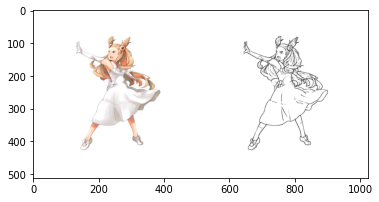

In [ ]:
image = Image.open('/content/val/1000113.png')
print("이미지 크기:", image.size)

plt.imshow(image)
plt.show()

# 5. 데이터셋 클래스 정의

In [ ]:
%cd /content/val

class ImageDataset(Dataset):
    def __init__(self, root, transforms_=None, mode="train"):
        self.transform = transforms_

        self.files = sorted(glob.glob(os.path.join(root, "/content/val") + "/*.png")) 

    def __getitem__(self, index):
        img = Image.open(self.files[index % len(self.files)])
        w, h = img.size
        img_A = img.crop((w / 2, 0, w, h)) # 이미지의 오른쪽 절반(A: sketch image)
        img_B = img.crop((0, 0, w / 2, h)) # 이미지의 왼쪽 절반(B: colored illustration image)       

        img_A = self.transform(img_A)
        img_B = self.transform(img_B)

        return {"A": img_A, "B": img_B}

    def __len__(self):
        return len(self.files)

/content/val


In [ ]:
transforms_ = transforms.Compose([
    transforms.Resize((256, 256), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = ImageDataset("data", transforms_=transforms_)  
val_dataset = ImageDataset("data", transforms_=transforms_)

train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=4)
val_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# 6. 생성자 및 판별자 모델 정의

In [ ]:
# U-Net 아키텍처의 다운 샘플링(Down Sampling) 모듈
class UNetDown(nn.Module):
    def __init__(self, in_channels, out_channels, normalize=True, dropout=0.0):
        super(UNetDown, self).__init__()
        # 너비와 높이가 2배씩 감소
        layers = [nn.Conv2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False)]
        if normalize:
            layers.append(nn.InstanceNorm2d(out_channels))
        layers.append(nn.LeakyReLU(0.2))
        if dropout:
            layers.append(nn.Dropout(dropout))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


# U-Net 아키텍처의 업 샘플링(Up Sampling) 모듈: Skip Connection 사용
class UNetUp(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.0):
        super(UNetUp, self).__init__()
        # 너비와 높이가 2배씩 증가
        layers = [nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False)]
        layers.append(nn.InstanceNorm2d(out_channels))
        layers.append(nn.ReLU(inplace=True))
        if dropout:
            layers.append(nn.Dropout(dropout))
        self.model = nn.Sequential(*layers)

    def forward(self, x, skip_input):
        x = self.model(x)
        x = torch.cat((x, skip_input), 1) # 채널 레벨에서 합치기(concatenation)

        return x


# U-Net 생성자(Generator) 아키텍처
class GeneratorUNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(GeneratorUNet, self).__init__()

        self.down1 = UNetDown(in_channels, 64, normalize=False) # 출력: [64 X 128 X 128]
        self.down2 = UNetDown(64, 128) # 출력: [128 X 64 X 64]
        self.down3 = UNetDown(128, 256) # 출력: [256 X 32 X 32]
        self.down4 = UNetDown(256, 512, dropout=0.5) # 출력: [512 X 16 X 16]
        self.down5 = UNetDown(512, 512, dropout=0.5) # 출력: [512 X 8 X 8]
        self.down6 = UNetDown(512, 512, dropout=0.5) # 출력: [512 X 4 X 4]
        self.down7 = UNetDown(512, 512, dropout=0.5) # 출력: [512 X 2 X 2]
        self.down8 = UNetDown(512, 512, normalize=False, dropout=0.5) # 출력: [512 X 1 X 1]

        # Skip Connection 사용(출력 채널의 크기 X 2 == 다음 입력 채널의 크기)
        self.up1 = UNetUp(512, 512, dropout=0.5) # 출력: [1024 X 2 X 2]
        self.up2 = UNetUp(1024, 512, dropout=0.5) # 출력: [1024 X 4 X 4]
        self.up3 = UNetUp(1024, 512, dropout=0.5) # 출력: [1024 X 8 X 8]
        self.up4 = UNetUp(1024, 512, dropout=0.5) # 출력: [1024 X 16 X 16]
        self.up5 = UNetUp(1024, 256) # 출력: [512 X 32 X 32]
        self.up6 = UNetUp(512, 128) # 출력: [256 X 64 X 64]
        self.up7 = UNetUp(256, 64) # 출력: [128 X 128 X 128]

        self.final = nn.Sequential(
            nn.Upsample(scale_factor=2), # 출력: [128 X 256 X 256]
            nn.ZeroPad2d((1, 0, 1, 0)),
            nn.Conv2d(128, out_channels, kernel_size=4, padding=1), # 출력: [3 X 256 X 256]
            nn.Tanh(),
        )

    def forward(self, x):
        # 인코더부터 디코더까지 순전파하는 U-Net 생성자(Generator)
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)
        d6 = self.down6(d5)
        d7 = self.down7(d6)
        d8 = self.down8(d7)
        u1 = self.up1(d8, d7)
        u2 = self.up2(u1, d6)
        u3 = self.up3(u2, d5)
        u4 = self.up4(u3, d4)
        u5 = self.up5(u4, d3)
        u6 = self.up6(u5, d2)
        u7 = self.up7(u6, d1)

        return self.final(u7)


# U-Net 판별자(Discriminator) 아키텍처
class Discriminator(nn.Module):
    def __init__(self, in_channels=3):
        super(Discriminator, self).__init__()

        def discriminator_block(in_channels, out_channels, normalization=True):
            # 너비와 높이가 2배씩 감소
            layers = [nn.Conv2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1)]
            if normalization:
                layers.append(nn.InstanceNorm2d(out_channels))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            # 두 개의 이미지(실제/변환된 이미지, 조건 이미지)를 입력 받으므로 입력 채널의 크기는 2배
            *discriminator_block(in_channels * 2, 64, normalization=False), # 출력: [64 X 128 X 128]
            *discriminator_block(64, 128), # 출력: [128 X 64 X 64]
            *discriminator_block(128, 256), # 출력: [256 X 32 X 32]
            *discriminator_block(256, 512), # 출력: [512 X 16 X 16]
            nn.ZeroPad2d((1, 0, 1, 0)),
            nn.Conv2d(512, 1, kernel_size=4, padding=1, bias=False) # 출력: [1 X 16 X 16]
        )

    # img_A: 실제/변환된 이미지, img_B: 조건(condition)
    def forward(self, img_A, img_B):
        # 이미지 두 개를 채널 레벨에서 연결하여(concatenate) 입력 데이터 생성
        img_input = torch.cat((img_A, img_B), 1)
        return self.model(img_input)

# 7. 모델 학습 및 샘플링 + 모델저장

colab 노트북의 경우 런타임 끊김을 방지하더라도 할당된 gpu 런타임 이상을 사용할 수 없음. 런타임이 종료될 경우 그동안 돌아간 모델이 날아갈 수 있어 25epoch씩 나눠 실행함.

본 데이터셋의 경우 25epoch를 돌릴 때마다 약 1시간이 소요됨.
각자의 노트북 gpu 사양 및 구동환경에 맞춰 한 셀에서 수행할 epoch를 수정가능


In [ ]:
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)


# 생성자(generator)와 판별자(discriminator) 초기화
generator = GeneratorUNet()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

# 가중치(weights) 초기화
generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

# 손실 함수(loss function)
criterion_GAN = torch.nn.MSELoss()
criterion_pixelwise = torch.nn.L1Loss()

criterion_GAN.cuda()
criterion_pixelwise.cuda()

# 학습률(learning rate) 설정
lr = 0.0002

# 생성자와 판별자를 위한 최적화 함수
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [ ]:
%cd /content/drive/MyDrive/pix2pix/v1(25e)

import time

n_epochs = 25 # 학습의 횟수(epoch) 설정
sample_interval = 500 # 몇 번의 배치(batch)마다 결과를 출력할 것인지 설정

# 변환된 이미지와 정답 이미지 사이의 L1 픽셀 단위(pixel-wise) 손실 가중치(weight) 파라미터
lambda_pixel = 100

start_time = time.time()

for epoch in range(n_epochs):
    for i, batch in enumerate(train_dataloader):
        # 모델의 입력(input) 데이터 불러오기
        real_A = batch["B"].cuda()
        real_B = batch["A"].cuda()

        # 진짜(real) 이미지와 가짜(fake) 이미지에 대한 정답 레이블 생성 (너바와 높이를 16씩 나눈 크기)
        real = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(1.0) # 진짜(real): 1
        fake = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(0.0) # 가짜(fake): 0

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 이미지 생성
        fake_B = generator(real_A)

        # 생성자(generator)의 손실(loss) 값 계산
        loss_GAN = criterion_GAN(discriminator(fake_B, real_A), real)

        # 픽셀 단위(pixel-wise) L1 손실 값 계산
        loss_pixel = criterion_pixelwise(fake_B, real_B) 

        # 최종적인 손실(loss)
        loss_G = loss_GAN + lambda_pixel * loss_pixel

        # 생성자(generator) 업데이트
        loss_G.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        loss_real = criterion_GAN(discriminator(real_B, real_A), real) # 조건(condition): real_A
        loss_fake = criterion_GAN(discriminator(fake_B.detach(), real_A), fake)
        loss_D = (loss_real + loss_fake) / 2

        # 판별자(discriminator) 업데이트
        loss_D.backward()
        optimizer_D.step()

        done = epoch * len(train_dataloader) + i
        if done % sample_interval == 0:
            imgs = next(iter(val_dataloader)) # 10개의 이미지를 추출해 생성
            real_A = imgs["B"].cuda()
            real_B = imgs["A"].cuda()
            fake_B = generator(real_A)
            # real_A: 조건(condition), fake_B: 변환된 이미지(translated image), real_B: 정답 이미지
            img_sample = torch.cat((real_A.data, fake_B.data, real_B.data), -2) # 높이(height)를 기준으로 이미지를 연결하기
            save_image(img_sample, f"{done}.png", nrow=5, normalize=True)

    # 하나의 epoch이 끝날 때마다 로그(log) 출력 및 W&B에 기록
    wandb.log({"epoch": epoch, "D loss": loss_D.item(), "G pixel loss": loss_pixel.item() , "adv loss" : loss_GAN.item()})
    print(f"[Epoch {epoch}/{n_epochs}] [D loss: {loss_D.item():.6f}] [G pixel loss: {loss_pixel.item():.6f}, adv loss: {loss_GAN.item()}] [Elapsed time: {time.time() - start_time:.2f}s]")



# 모델 파라미터 저장
%cd /content/drive/MyDrive/pix2pix/trained_model
torch.save(generator.state_dict(), "Pix2Pix_Generator_V1(25e).pt")
torch.save(discriminator.state_dict(), "Pix2Pix_Discriminator_V1(25e).pt")
print("Model saved!")



/content/drive/MyDrive/pix2pix/v1(25e)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Epoch 0/25] [D loss: 0.206595] [G pixel loss: 0.058376, adv loss: 0.3245409429073334] [Elapsed time: 139.31s]
[Epoch 1/25] [D loss: 0.207007] [G pixel loss: 0.047807, adv loss: 0.49781760573387146] [Elapsed time: 283.15s]
[Epoch 2/25] [D loss: 0.198296] [G pixel loss: 0.041695, adv loss: 0.3877752721309662] [Elapsed time: 428.45s]
[Epoch 3/25] [D loss: 0.238441] [G pixel loss: 0.039293, adv loss: 0.39839011430740356] [Elapsed time: 572.70s]
[Epoch 4/25] [D loss: 0.243874] [G pixel loss: 0.032618, adv loss: 0.2061014175415039] [Elapsed time: 718.44s]
[Epoch 5/25] [D loss: 0.194431] [G pixel loss: 0.036985, adv loss: 0.38121992349624634] [Elapsed time: 863.85s]
[Epoch 6/25] [D loss: 0.248238] [G pixel loss: 0.033371, adv loss: 0.5324808955192566] [Elapsed time: 1008.00s]
[Epoch 7/25] [D loss: 0.266824] [G pixel loss: 0.023078, adv loss: 0.4667045772075653] [Elapsed time: 1153.55s]
[Epoch 8/25] [D loss: 0.227140] [G pixel loss: 0.022891, adv loss: 0.30687424540519714] [Elapsed time: 1298

# 8. 같은 데이터로 추가학습

생성자 및 판별자 모델 정의(6번)까지 셀 실행하고 진행

모델 불러와 추가학습

### ~50epoch

In [ ]:
%cd /content/drive/MyDrive/pix2pix/trained_model

# 모델 불러오기
generator = GeneratorUNet()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

generator.load_state_dict(torch.load("Pix2Pix_Generator_V1(25e).pt"))
discriminator.load_state_dict(torch.load("Pix2Pix_Discriminator_V1(25e).pt"))

generator.eval();
discriminator.eval();

# 손실 함수(loss function)
criterion_GAN = torch.nn.MSELoss()
criterion_pixelwise = torch.nn.L1Loss()

criterion_GAN.cuda()
criterion_pixelwise.cuda()

# 학습률(learning rate) 설정
lr = 0.0002

# 생성자와 판별자를 위한 최적화 함수
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

/content/drive/MyDrive/pix2pix/trained_model


In [ ]:
%cd /content/drive/MyDrive/pix2pix/v1(50e)

import time

n_epochs = 25 # 학습의 횟수(epoch) 설정
sample_interval = 500 # 몇 번의 배치(batch)마다 결과를 출력할 것인지 설정

# 변환된 이미지와 정답 이미지 사이의 L1 픽셀 단위(pixel-wise) 손실 가중치(weight) 파라미터
lambda_pixel = 100

start_time = time.time()

for epoch in range(n_epochs):
    for i, batch in enumerate(train_dataloader):
        # 모델의 입력(input) 데이터 불러오기
        real_A = batch["B"].cuda()
        real_B = batch["A"].cuda()

        # 진짜(real) 이미지와 가짜(fake) 이미지에 대한 정답 레이블 생성 (너바와 높이를 16씩 나눈 크기)
        real = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(1.0) # 진짜(real): 1
        fake = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(0.0) # 가짜(fake): 0

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 이미지 생성
        fake_B = generator(real_A)

        # 생성자(generator)의 손실(loss) 값 계산
        loss_GAN = criterion_GAN(discriminator(fake_B, real_A), real)

        # 픽셀 단위(pixel-wise) L1 손실 값 계산
        loss_pixel = criterion_pixelwise(fake_B, real_B) 

        # 최종적인 손실(loss)
        loss_G = loss_GAN + lambda_pixel * loss_pixel

        # 생성자(generator) 업데이트
        loss_G.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        loss_real = criterion_GAN(discriminator(real_B, real_A), real) # 조건(condition): real_A
        loss_fake = criterion_GAN(discriminator(fake_B.detach(), real_A), fake)
        loss_D = (loss_real + loss_fake) / 2

        # 판별자(discriminator) 업데이트
        loss_D.backward()
        optimizer_D.step()

        done = (epoch+25) * len(train_dataloader) + i
        if done % sample_interval == 0:
            imgs = next(iter(val_dataloader)) # 10개의 이미지를 추출해 생성
            real_A = imgs["B"].cuda()
            real_B = imgs["A"].cuda()
            fake_B = generator(real_A)
            # real_A: 조건(condition), fake_B: 변환된 이미지(translated image), real_B: 정답 이미지
            img_sample = torch.cat((real_A.data, fake_B.data, real_B.data), -2) # 높이(height)를 기준으로 이미지를 연결하기
            save_image(img_sample, f"{done}.png", nrow=5, normalize=True)

    # 하나의 epoch이 끝날 때마다 로그(log) 출력
    wandb.log({"epoch": epoch+25, "D loss": loss_D.item(), "G pixel loss": loss_pixel.item() , "adv loss" : loss_GAN.item()})
    print(f"[Epoch {epoch+25}/{n_epochs+25}] [D loss: {loss_D.item():.6f}] [G pixel loss: {loss_pixel.item():.6f}, adv loss: {loss_GAN.item()}] [Elapsed time: {time.time() - start_time:.2f}s]")

%cd /content/drive/MyDrive/pix2pix/trained_model

# 모델 파라미터 저장
torch.save(generator.state_dict(), "Pix2Pix_Generator_V1(50e).pt")
torch.save(discriminator.state_dict(), "Pix2Pix_Discriminator_V1(50e).pt")
print("Model saved!")

/content/drive/MyDrive/pix2pix/v1(50e)
[Epoch 25/50] [D loss: 0.324931] [G pixel loss: 0.022123, adv loss: 0.7617630362510681] [Elapsed time: 142.28s]
[Epoch 26/50] [D loss: 0.199738] [G pixel loss: 0.046073, adv loss: 0.27891460061073303] [Elapsed time: 287.46s]
[Epoch 27/50] [D loss: 0.447237] [G pixel loss: 0.024864, adv loss: 0.9122495651245117] [Elapsed time: 432.06s]
[Epoch 28/50] [D loss: 0.181513] [G pixel loss: 0.027035, adv loss: 0.40665102005004883] [Elapsed time: 577.76s]
[Epoch 29/50] [D loss: 0.248707] [G pixel loss: 0.025669, adv loss: 0.2773643434047699] [Elapsed time: 723.40s]
[Epoch 30/50] [D loss: 0.196692] [G pixel loss: 0.026620, adv loss: 0.48789307475090027] [Elapsed time: 869.94s]
[Epoch 31/50] [D loss: 0.190513] [G pixel loss: 0.027872, adv loss: 0.24120484292507172] [Elapsed time: 1014.54s]
[Epoch 32/50] [D loss: 0.232718] [G pixel loss: 0.025320, adv loss: 0.2333695888519287] [Elapsed time: 1160.21s]
[Epoch 33/50] [D loss: 0.229576] [G pixel loss: 0.026532, a

### ~75epoch

In [ ]:
%cd /content/drive/MyDrive/pix2pix/trained_model

# 모델 불러오기
generator = GeneratorUNet()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

generator.load_state_dict(torch.load("Pix2Pix_Generator_V1(50e).pt"))
discriminator.load_state_dict(torch.load("Pix2Pix_Discriminator_V1(50e).pt"))

generator.eval();
discriminator.eval();

# 손실 함수(loss function)
criterion_GAN = torch.nn.MSELoss()
criterion_pixelwise = torch.nn.L1Loss()

criterion_GAN.cuda()
criterion_pixelwise.cuda()

# 학습률(learning rate) 설정
lr = 0.0002

# 생성자와 판별자를 위한 최적화 함수
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

/content/drive/MyDrive/pix2pix/trained_model


In [ ]:
%cd /content/drive/MyDrive/pix2pix/v1(75e)

import time

n_epochs = 25 # 학습의 횟수(epoch) 설정
sample_interval = 500 # 몇 번의 배치(batch)마다 결과를 출력할 것인지 설정

# 변환된 이미지와 정답 이미지 사이의 L1 픽셀 단위(pixel-wise) 손실 가중치(weight) 파라미터
lambda_pixel = 100

start_time = time.time()

for epoch in range(n_epochs):
    for i, batch in enumerate(train_dataloader):
        # 모델의 입력(input) 데이터 불러오기
        real_A = batch["B"].cuda()
        real_B = batch["A"].cuda()

        # 진짜(real) 이미지와 가짜(fake) 이미지에 대한 정답 레이블 생성 (너바와 높이를 16씩 나눈 크기)
        real = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(1.0) # 진짜(real): 1
        fake = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(0.0) # 가짜(fake): 0

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 이미지 생성
        fake_B = generator(real_A)

        # 생성자(generator)의 손실(loss) 값 계산
        loss_GAN = criterion_GAN(discriminator(fake_B, real_A), real)

        # 픽셀 단위(pixel-wise) L1 손실 값 계산
        loss_pixel = criterion_pixelwise(fake_B, real_B) 

        # 최종적인 손실(loss)
        loss_G = loss_GAN + lambda_pixel * loss_pixel

        # 생성자(generator) 업데이트
        loss_G.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        loss_real = criterion_GAN(discriminator(real_B, real_A), real) # 조건(condition): real_A
        loss_fake = criterion_GAN(discriminator(fake_B.detach(), real_A), fake)
        loss_D = (loss_real + loss_fake) / 2

        # 판별자(discriminator) 업데이트
        loss_D.backward()
        optimizer_D.step()

        done = (epoch+50) * len(train_dataloader) + i
        if done % sample_interval == 0:
            imgs = next(iter(val_dataloader)) # 10개의 이미지를 추출해 생성
            real_A = imgs["B"].cuda()
            real_B = imgs["A"].cuda()
            fake_B = generator(real_A)
            # real_A: 조건(condition), fake_B: 변환된 이미지(translated image), real_B: 정답 이미지
            img_sample = torch.cat((real_A.data, fake_B.data, real_B.data), -2) # 높이(height)를 기준으로 이미지를 연결하기
            save_image(img_sample, f"{done}.png", nrow=5, normalize=True)

    # 하나의 epoch이 끝날 때마다 로그(log) 출력
    wandb.log({"epoch": epoch+50, "D loss": loss_D.item(), "G pixel loss": loss_pixel.item() , "adv loss" : loss_GAN.item()})
    print(f"[Epoch {epoch+50}/{n_epochs+50}] [D loss: {loss_D.item():.6f}] [G pixel loss: {loss_pixel.item():.6f}, adv loss: {loss_GAN.item()}] [Elapsed time: {time.time() - start_time:.2f}s]")

%cd /content/drive/MyDrive/pix2pix/trained_model

# 모델 파라미터 저장
torch.save(generator.state_dict(), "Pix2Pix_Generator_V1(75e).pt")
torch.save(discriminator.state_dict(), "Pix2Pix_Discriminator_V1(75e).pt")
print("Model saved!")

/content/drive/MyDrive/pix2pix/v1(75e)
[Epoch 50/75] [D loss: 0.201935] [G pixel loss: 0.020780, adv loss: 0.2233169823884964] [Elapsed time: 137.40s]
[Epoch 51/75] [D loss: 0.245270] [G pixel loss: 0.014309, adv loss: 0.34879618883132935] [Elapsed time: 279.21s]
[Epoch 52/75] [D loss: 0.163291] [G pixel loss: 0.034908, adv loss: 0.44457682967185974] [Elapsed time: 424.16s]
[Epoch 53/75] [D loss: 0.208336] [G pixel loss: 0.016121, adv loss: 0.26329338550567627] [Elapsed time: 569.65s]
[Epoch 54/75] [D loss: 0.247770] [G pixel loss: 0.020476, adv loss: 0.2257016897201538] [Elapsed time: 715.31s]
[Epoch 55/75] [D loss: 0.206678] [G pixel loss: 0.021524, adv loss: 0.3788467347621918] [Elapsed time: 859.95s]
[Epoch 56/75] [D loss: 0.161133] [G pixel loss: 0.022289, adv loss: 0.321333646774292] [Elapsed time: 1006.07s]
[Epoch 57/75] [D loss: 0.215631] [G pixel loss: 0.015156, adv loss: 0.22882592678070068] [Elapsed time: 1152.52s]
[Epoch 58/75] [D loss: 0.251541] [G pixel loss: 0.022200, ad

## ~100epoch 

In [ ]:
%cd /content/drive/MyDrive/pix2pix/trained_model

# 모델 불러오기
generator = GeneratorUNet()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

generator.load_state_dict(torch.load("Pix2Pix_Generator_V1(75e).pt"))
discriminator.load_state_dict(torch.load("Pix2Pix_Discriminator_V1(75e).pt"))

generator.eval();
discriminator.eval();

# 손실 함수(loss function)
criterion_GAN = torch.nn.MSELoss()
criterion_pixelwise = torch.nn.L1Loss()

criterion_GAN.cuda()
criterion_pixelwise.cuda()

# 학습률(learning rate) 설정
lr = 0.0002

# 생성자와 판별자를 위한 최적화 함수
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

/content/drive/MyDrive/pix2pix/trained_model


In [ ]:
%cd /content/drive/MyDrive/pix2pix/v1(100e)

import time

n_epochs = 25 # 학습의 횟수(epoch) 설정
sample_interval = 500 # 몇 번의 배치(batch)마다 결과를 출력할 것인지 설정

# 변환된 이미지와 정답 이미지 사이의 L1 픽셀 단위(pixel-wise) 손실 가중치(weight) 파라미터
lambda_pixel = 100

start_time = time.time()

for epoch in range(n_epochs):
    for i, batch in enumerate(train_dataloader):
        # 모델의 입력(input) 데이터 불러오기
        real_A = batch["B"].cuda()
        real_B = batch["A"].cuda()

        # 진짜(real) 이미지와 가짜(fake) 이미지에 대한 정답 레이블 생성 (너바와 높이를 16씩 나눈 크기)
        real = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(1.0) # 진짜(real): 1
        fake = torch.cuda.FloatTensor(real_A.size(0), 1, 16, 16).fill_(0.0) # 가짜(fake): 0

        """ 생성자(generator)를 학습합니다. """
        optimizer_G.zero_grad()

        # 이미지 생성
        fake_B = generator(real_A)

        # 생성자(generator)의 손실(loss) 값 계산
        loss_GAN = criterion_GAN(discriminator(fake_B, real_A), real)

        # 픽셀 단위(pixel-wise) L1 손실 값 계산
        loss_pixel = criterion_pixelwise(fake_B, real_B) 

        # 최종적인 손실(loss)
        loss_G = loss_GAN + lambda_pixel * loss_pixel

        # 생성자(generator) 업데이트
        loss_G.backward()
        optimizer_G.step()

        """ 판별자(discriminator)를 학습합니다. """
        optimizer_D.zero_grad()

        # 판별자(discriminator)의 손실(loss) 값 계산
        loss_real = criterion_GAN(discriminator(real_B, real_A), real) # 조건(condition): real_A
        loss_fake = criterion_GAN(discriminator(fake_B.detach(), real_A), fake)
        loss_D = (loss_real + loss_fake) / 2

        # 판별자(discriminator) 업데이트
        loss_D.backward()
        optimizer_D.step()

        done = (epoch+75) * len(train_dataloader) + i
        if done % sample_interval == 0:
            imgs = next(iter(val_dataloader)) # 10개의 이미지를 추출해 생성
            real_A = imgs["B"].cuda()
            real_B = imgs["A"].cuda()
            fake_B = generator(real_A)
            # real_A: 조건(condition), fake_B: 변환된 이미지(translated image), real_B: 정답 이미지
            img_sample = torch.cat((real_A.data, fake_B.data, real_B.data), -2) # 높이(height)를 기준으로 이미지를 연결하기
            save_image(img_sample, f"{done}.png", nrow=5, normalize=True)

    # 하나의 epoch이 끝날 때마다 로그(log) 출력
    wandb.log({"epoch": epoch+75, "D loss": loss_D.item(), "G pixel loss": loss_pixel.item() , "adv loss" : loss_GAN.item()})
    print(f"[Epoch {epoch+75}/{n_epochs+75}] [D loss: {loss_D.item():.6f}] [G pixel loss: {loss_pixel.item():.6f}, adv loss: {loss_GAN.item()}] [Elapsed time: {time.time() - start_time:.2f}s]")

%cd /content/drive/MyDrive/pix2pix/trained_model

# 모델 파라미터 저장
torch.save(generator.state_dict(), "Pix2Pix_Generator_V1(100e).pt")
torch.save(discriminator.state_dict(), "Pix2Pix_Discriminator_V1(100e).pt")
print("Model saved!")

/content/drive/MyDrive/pix2pix/v1(100e)
[Epoch 75/100] [D loss: 0.191752] [G pixel loss: 0.020446, adv loss: 0.34612637758255005] [Elapsed time: 139.82s]
[Epoch 76/100] [D loss: 0.239074] [G pixel loss: 0.019532, adv loss: 0.12467532604932785] [Elapsed time: 284.55s]
[Epoch 77/100] [D loss: 0.185376] [G pixel loss: 0.019972, adv loss: 0.4469554126262665] [Elapsed time: 430.32s]
[Epoch 78/100] [D loss: 0.194631] [G pixel loss: 0.018606, adv loss: 0.30172258615493774] [Elapsed time: 575.99s]
[Epoch 79/100] [D loss: 0.272770] [G pixel loss: 0.018436, adv loss: 0.5255028605461121] [Elapsed time: 720.63s]
[Epoch 80/100] [D loss: 0.194626] [G pixel loss: 0.017379, adv loss: 0.2978973090648651] [Elapsed time: 866.23s]
[Epoch 81/100] [D loss: 0.203082] [G pixel loss: 0.021269, adv loss: 0.3331761956214905] [Elapsed time: 1012.51s]
[Epoch 82/100] [D loss: 0.250774] [G pixel loss: 0.014521, adv loss: 0.23894277215003967] [Elapsed time: 1157.20s]
[Epoch 83/100] [D loss: 0.230135] [G pixel loss: 0

# 9. 모델 사용하기

참조한 코드 https://github.com/suhoy901/ImageTranslation/blob/master/Pix2Pix/1.%20Pix2Pix_train.ipynb

In [ ]:
from __future__ import print_function
import argparse

from torch.autograd import Variable

import PIL.Image
import PIL.ImageTk
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image


def is_image_file(filename):
    return any(filename.endswith(extension) for extension in [".png", ".jpg", ".jpeg"])


def load_img(filepath):
    img = PIL.Image.open(filepath).convert('RGB')
    img = img.resize((256, 256))
    return img


def save_img(image_tensor, filename):
    image_numpy = image_tensor.float().numpy()
    image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    image_numpy = image_numpy.astype(np.uint8)
    image_pil = Image.fromarray(image_numpy)
    image_pil.save(filename)
    print("Image saved as {}".format(filename))


parser = argparse.ArgumentParser()
parser.add_argument('--dataset', required=False, default='illustration', help='illustration')
parser.add_argument('--model', required=False, type=str, default='Pix2Pix_Generator_V1(1).pt', help='model file to use')
parser.add_argument('--cuda', action='store_true', default=True, help='use cuda')
params = parser.parse_args([])
print(params)

Namespace(cuda=True, dataset='illustration', model='Pix2Pix_Generator_V1(1).pt')


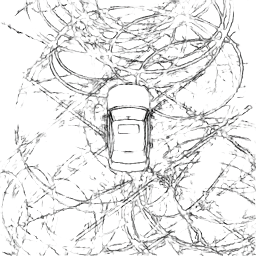

In [ ]:
#@markdown #**이미지 파일 하나만 넣을 때**
#@markdown ---
target_imagefile = "/content/drive/MyDrive/data/photo/\u110C\u1161\u1103\u1169\u11BC\u110E\u1161 \u1109\u1161\u110C\u1175\u11AB1.jpg\u110B\u1174 \u1109\u1161\u1107\u1169\u11AB"#@param {type:"string"} 

imgs = load_img(target_imagefile) #인풋 이미지 경로 넣기
imgs = transforms_(imgs)

input = Variable(imgs).view(1,-1,256,256)
input_img = input.data[0]

if params.cuda:
    generator = generator.cuda()
    input = input.cuda()

out = generator(input)
out = out.cpu()
out_img = out.data[0]
save_image(out_img, "result.png", nrow=1, normalize=True)

Image('result.png')